In [1]:
%pip install -q dagshub mlflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import dagshub

# Initialize DagsHub's MLflow tracking with your repository credentials
dagshub.init(repo_owner='Omdena', repo_name='MyanmarChapter_MicroGridOptimization', mlflow=True)


Accessing as nino.godoradze

Initialized MLflow to track repo "Omdena/MyanmarChapter_MicroGridOptimization"

Repository Omdena/MyanmarChapter_MicroGridOptimization initialized!

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv(r'C:\Users\Nino\Desktop\My Files\Omdena Project\data\processed\Bago_Bago_pv_weather_merged.csv')

In [20]:
df.head()

,electricity,date,time,year,month,day,latitude,longitude,elevation,utc_offset_seconds,...,precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s),shortwave_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²)
0,0.0,2022-01-01,0:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,20,6.5,0,0.00,0,0,0.0,0
1,0.0,2022-01-01,1:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,9,5.0,1,1477.94,46,26,149.8,46
2,0.0,2022-01-01,2:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,0,6.1,1,3600.00,225,76,501.6,225
3,0.0,2022-01-01,3:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,1,26,5.9,1,3600.00,429,95,691.7,429
4,0.0,2022-01-01,4:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,1,30,6.0,1,3600.00,570,155,661.0,570


In [21]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [22]:
columns=['electricity','sunshine_duration (s)', 'shortwave_radiation (W/m²)', 'is_day ()', 'temperature_2m (°C)', 'cloud_cover (%)']
for col in columns:
    for lag in range(1,25):
        df[f'{col}_lag_{lag}']=df[col].shift(lag)


In [16]:
df_zeroelectricity=df[(df['electricity']==0 )& (df['is_day ()']==1)][['month','time']]

In [20]:
df[df['is_day ()']==0][['month','time']]

,month,time
7,1,13:00:00
8,1,14:00:00
9,1,15:00:00
10,1,16:00:00
11,1,17:00:00
...,...,...
8773,1,19:00:00
8774,1,20:00:00
8775,1,21:00:00
8776,1,22:00:00


In [18]:
df_grouped=df_zeroelectricity.groupby(['month','time']).count()
df_grouped

Empty DataFrame
Columns: []
Index: [(1, 10:00:00), (1, 11:00:00), (1, 1:00:00), (1, 2:00:00), (1, 3:00:00), (1, 4:00:00), (1, 5:00:00), (1, 6:00:00), (1, 7:00:00), (1, 8:00:00), (1, 9:00:00), (2, 0:00:00), (2, 10:00:00), (2, 11:00:00), (2, 1:00:00), (2, 2:00:00), (2, 3:00:00), (2, 4:00:00), (2, 5:00:00), (2, 6:00:00), (2, 7:00:00), (2, 8:00:00), (2, 9:00:00), (3, 0:00:00), (3, 10:00:00), (3, 11:00:00), (3, 1:00:00), (3, 2:00:00), (3, 3:00:00), (3, 4:00:00), (3, 5:00:00), (3, 6:00:00), (3, 7:00:00), (3, 8:00:00), (3, 9:00:00), (4, 10:00:00), (4, 11:00:00), (4, 1:00:00), (4, 2:00:00), (4, 3:00:00), (4, 4:00:00), (4, 5:00:00), (4, 6:00:00), (4, 7:00:00), (4, 8:00:00), (4, 9:00:00), (5, 10:00:00), (5, 11:00:00), (5, 1:00:00), (5, 2:00:00), (5, 3:00:00), (5, 4:00:00), (5, 5:00:00), (5, 6:00:00), (5, 7:00:00), (5, 8:00:00), (5, 9:00:00), (6, 10:00:00), (6, 11:00:00), (6, 1:00:00), (6, 2:00:00), (6, 3:00:00), (6, 4:00:00), (6, 5:00:00), (6, 6:00:00), (6, 7:00:00), (6, 8:00:00), (6, 9:00:00), (7, 10:00:00), (7, 11:00:00), (7, 1:00:00), (7, 2:00:00), (7, 3:00:00), (7, 4:00:00), (7, 5:00:00), (7, 6:00:00), (7, 7:00:00), (7, 8:00:00), (7, 9:00:00), (8, 10:00:00), (8, 11:00:00), (8, 1:00:00), (8, 2:00:00), (8, 3:00:00), (8, 4:00:00), (8, 5:00:00), (8, 6:00:00), (8, 7:00:00), (8, 8:00:00), (8, 9:00:00), (9, 0:00:00), (9, 10:00:00), (9, 11:00:00), (9, 1:00:00), (9, 2:00:00), (9, 3:00:00), (9, 4:00:00), (9, 5:00:00), (9, 6:00:00), (9, 7:00:00), ...]

[138 rows x 0 columns]

In [23]:

df['electricity_future'] = df['electricity'].shift(-24)
df.dropna(inplace=True)

df['electricity'].describe()


count    8736.000000
mean        0.176454
std         0.236947
min         0.000000
25%         0.000000
50%         0.001000
75%         0.354000
max         0.813000
Name: electricity, dtype: float64

In [25]:
df = df.dropna(subset=['electricity_future'])


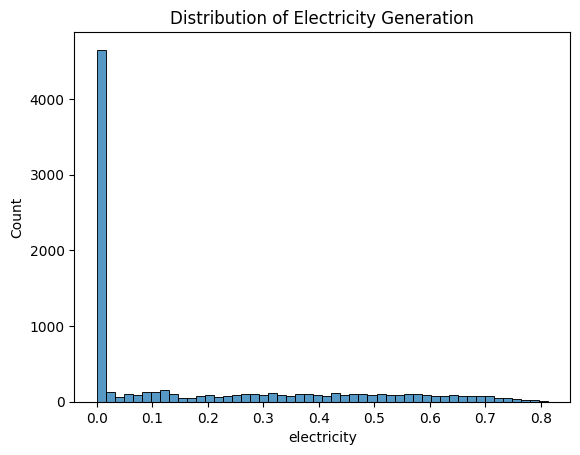

In [8]:
import seaborn as sns

# Plot distribution
sns.histplot(df['electricity'], bins=50)
plt.title("Distribution of Electricity Generation")
plt.show()


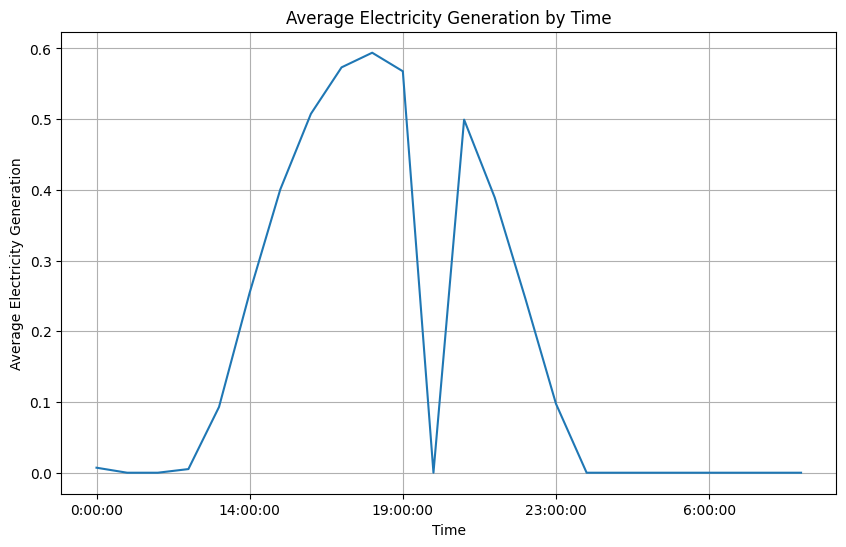

In [11]:
import matplotlib.pyplot as plt

# Perform the groupby operation
T = df.groupby('time')['electricity'].mean()

# Plotting the result
plt.figure(figsize=(10,6))
T.plot(kind='line')

plt.title('Average Electricity Generation by Time')
plt.xlabel('Time')
plt.ylabel('Average Electricity Generation')
plt.grid(True)

# Show the plot
plt.show()


In [26]:
df['isw']=df['day'].apply(lambda x: 1 if x <=5 else 0 )

In [27]:

def get_season_myanmar(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [6,7,8,9,10]:
        return 'rainy'
    elif month in [3,4,5]:
        return 'Summer'
 
df['season'] = df['month'].apply(get_season_myanmar)


df['season'].value_counts()


season
rainy     3672
Winter    2856
Summer    2208
Name: count, dtype: int64

In [28]:
df.head()

,electricity,date,time,year,month,day,latitude,longitude,elevation,utc_offset_seconds,...,cloud_cover (%)_lag_18,cloud_cover (%)_lag_19,cloud_cover (%)_lag_20,cloud_cover (%)_lag_21,cloud_cover (%)_lag_22,cloud_cover (%)_lag_23,cloud_cover (%)_lag_24,electricity_future,isw,season
24,0.0,2022-01-02,6:00:00,2022,1,2,17.328646,96.50289,13,0,...,12.0,12.0,30.0,26.0,0.0,9.0,20.0,0.0,1,Winter
25,0.0,2022-01-02,7:00:00,2022,1,2,17.328646,96.50289,13,0,...,3.0,12.0,12.0,30.0,26.0,0.0,9.0,0.0,1,Winter
26,0.0,2022-01-02,8:00:00,2022,1,2,17.328646,96.50289,13,0,...,2.0,3.0,12.0,12.0,30.0,26.0,0.0,0.0,1,Winter
27,0.0,2022-01-02,9:00:00,2022,1,2,17.328646,96.50289,13,0,...,2.0,2.0,3.0,12.0,12.0,30.0,26.0,0.0,1,Winter
28,0.0,2022-01-02,10:00:00,2022,1,2,17.328646,96.50289,13,0,...,2.0,2.0,2.0,3.0,12.0,12.0,30.0,0.0,1,Winter


In [29]:
df = pd.get_dummies(df, columns=['season'], drop_first=False)
for col in df.columns:
    if 'season_' in col:
        df[col]=df[col].astype('int')

In [30]:
df.head()

,electricity,date,time,year,month,day,latitude,longitude,elevation,utc_offset_seconds,...,cloud_cover (%)_lag_20,cloud_cover (%)_lag_21,cloud_cover (%)_lag_22,cloud_cover (%)_lag_23,cloud_cover (%)_lag_24,electricity_future,isw,season_Summer,season_Winter,season_rainy
24,0.0,2022-01-02,6:00:00,2022,1,2,17.328646,96.50289,13,0,...,30.0,26.0,0.0,9.0,20.0,0.0,1,0,1,0
25,0.0,2022-01-02,7:00:00,2022,1,2,17.328646,96.50289,13,0,...,12.0,30.0,26.0,0.0,9.0,0.0,1,0,1,0
26,0.0,2022-01-02,8:00:00,2022,1,2,17.328646,96.50289,13,0,...,12.0,12.0,30.0,26.0,0.0,0.0,1,0,1,0
27,0.0,2022-01-02,9:00:00,2022,1,2,17.328646,96.50289,13,0,...,3.0,12.0,12.0,30.0,26.0,0.0,1,0,1,0
28,0.0,2022-01-02,10:00:00,2022,1,2,17.328646,96.50289,13,0,...,2.0,3.0,12.0,12.0,30.0,0.0,1,0,1,0


In [31]:
df_oot=df[df['month'].isin([9,10,11])]
df=df[~df.index.isin(df_oot.index)]

In [32]:
columns_list = df.columns.tolist()
print(columns_list)


['electricity', 'date', 'time', 'year', 'month', 'day', 'latitude', 'longitude', 'elevation', 'utc_offset_seconds', 'timezone', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'weather_code (wmo code)', 'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'sunshine_duration (s)', 'shortwave_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)', 'electricity_lag_1', 'electricity_lag_2', 'electricity_lag_3', 'electricity_lag_4', 'electricity_lag_5', 'electricity_lag_6', 'electricity_lag_7', 'electricity_lag_8', 'electricity_lag_9', 'electricity_lag_10', 'electricity_lag_11', 'electricity_lag_12', 'electricity_lag_13', 'electricity_lag_14', 'electricity_lag_15', 'electricity_lag_16', 'electricity_lag_17', 'electricity_lag_18', 'electricity_lag_19', 'electricity_lag_20', 'electricity_lag_21', 'electricity_lag_22', 'electricity_lag_23', 'electricity_lag_24', 'sunshine_duration (s)

In [33]:
X = df[['electricity','sunshine_duration (s)', 'shortwave_radiation (W/m²)', 'is_day ()', 'temperature_2m (°C)', 'cloud_cover (%)',  'electricity_lag_1', 'electricity_lag_2', 'sunshine_duration (s)_lag_1', 'sunshine_duration (s)_lag_2', 'shortwave_radiation (W/m²)_lag_1', 'shortwave_radiation (W/m²)_lag_2', 'is_day ()_lag_1', 'is_day ()_lag_2', 'temperature_2m (°C)_lag_1', 'temperature_2m (°C)_lag_2', 'cloud_cover (%)_lag_1', 'cloud_cover (%)_lag_2', 'season_Summer', 'season_Winter', 'season_rainy','isw']]
y = df['electricity_future']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid with ranges to explore
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of boosted trees
    'subsample': [0.6, 0.8, 1],               # Fraction of the training set used to grow trees
    'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage
    'max_depth': [2, 3, 6],                   # Maximum tree depth for base learners
    'colsample_bytree': [0.6, 0.8, 1],        # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1, 2, 5]             # Minimum sum of instance weight (hessian) needed in a child
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Use MSE for regression evaluation
                           cv=3,                              # Cross-validation folds
                           verbose=1,                         # Show progress
                           n_jobs=-1)                         # Use all available cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE score from Grid Search: ", (-grid_search.best_score_)**0.5)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1}
Best RMSE score from Grid Search:  0.05985173398029764


MLFLOW

In [36]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Enable automatic logging for XGBoost models
mlflow.xgboost.autolog()

with mlflow.start_run(run_name="XGBoost - 24 Hour Energy Prediction") as run:
    # Initialize XGBoost Regressor (example)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                 n_estimators=100,
                                 subsample=1,
                                 learning_rate=0.1,
                                 max_depth=2,
                                 colsample_bytree=1,
                                 min_child_weight=5)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Log the evaluation metrics automatically (MLflow will log model params and metrics)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MSE on test: {mse}')
    print(f'RMSE on test: {rmse}')
    print(f'R² on test: {r2}')

    # Log your custom metrics
    mlflow.log_metric('mse_test', mse)
    mlflow.log_metric('rmse_test', rmse)
    mlflow.log_metric('r2_test', r2)

    X_oot = df_oot[X_train.columns]
    y_pred_oot = xgb_model.predict(X_oot)
    y_actual_oot = df_oot['electricity_future']

    mse_oot = mean_squared_error(y_actual_oot, y_pred_oot)
    rmse_oot = mse_oot**0.5
    r2_oot = r2_score(y_actual_oot, y_pred_oot)

    print(f'MSE on OOT: {mse_oot}')
    print(f'RMSE on OOT: {rmse_oot}')
    print(f'R² on OOT: {r2_oot}')

    # Log OOT metrics in MLflow
    mlflow.log_metric('mse_oot', mse_oot)
    mlflow.log_metric('rmse_oot', rmse_oot)
    mlflow.log_metric('r2_oot', r2_oot)

    # Optional: log the features used
    mlflow.log_text(str(X_train.columns.tolist()), "features.txt")

    

  


2024/09/29 14:55:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/29 14:55:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Nino\AppData\Loca

MSE on test: 0.004949550910166643
RMSE on test: 0.07035304478248715
R² on test: 0.9128013923728147


2024/09/29 14:56:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


MSE on OOT: 0.005912296489741382
RMSE on OOT: 0.07689145914691295
R² on OOT: 0.8951731483785709


2024/09/29 14:56:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost - 24 Hour Energy Prediction at: https://dagshub.com/Omdena/MyanmarChapter_MicroGridOptimization.mlflow/#/experiments/0/runs/557454fc7e5d4c7d9c962448a1b1a82a.
2024/09/29 14:56:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Omdena/MyanmarChapter_MicroGridOptimization.mlflow/#/experiments/0.


Mean Squared Error: 0.004949550910166643
Root Mean Squared Error: 0.07035304478248715


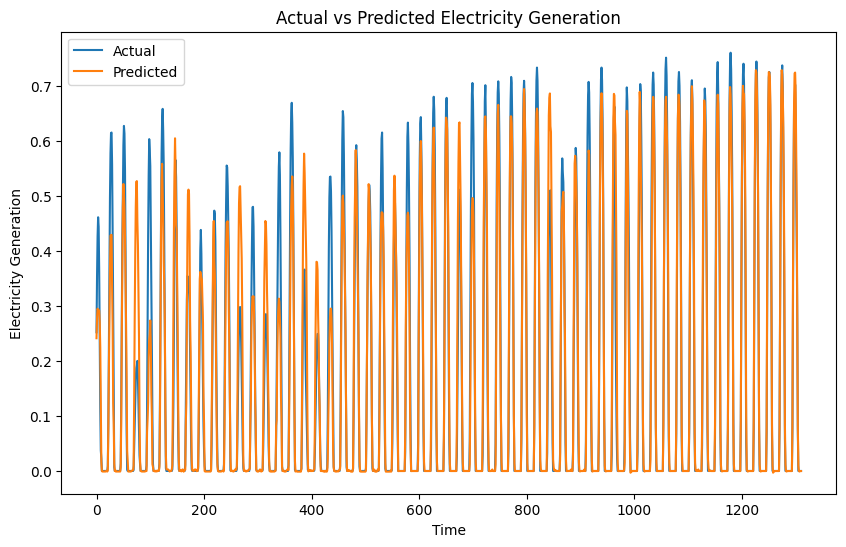

In [37]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Electricity Generation')
plt.xlabel('Time')
plt.ylabel('Electricity Generation')
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have your actual and predicted values from the regression model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.004949550910166643
Root Mean Squared Error (RMSE): 0.07035304478248715
Mean Absolute Error (MAE): 0.03658890426545968
R² Score: 0.9128013923728147


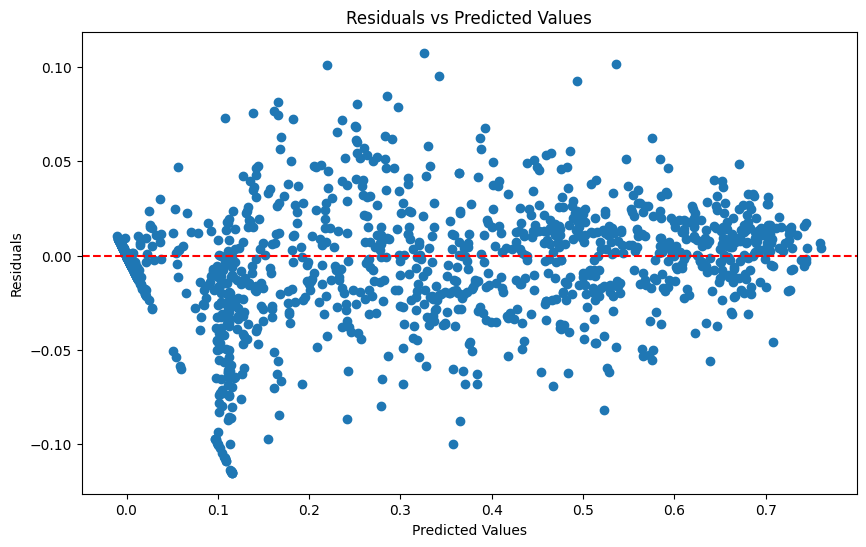

In [27]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = df_oot['electricity_future'] - y_pred_oot

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred_oot, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


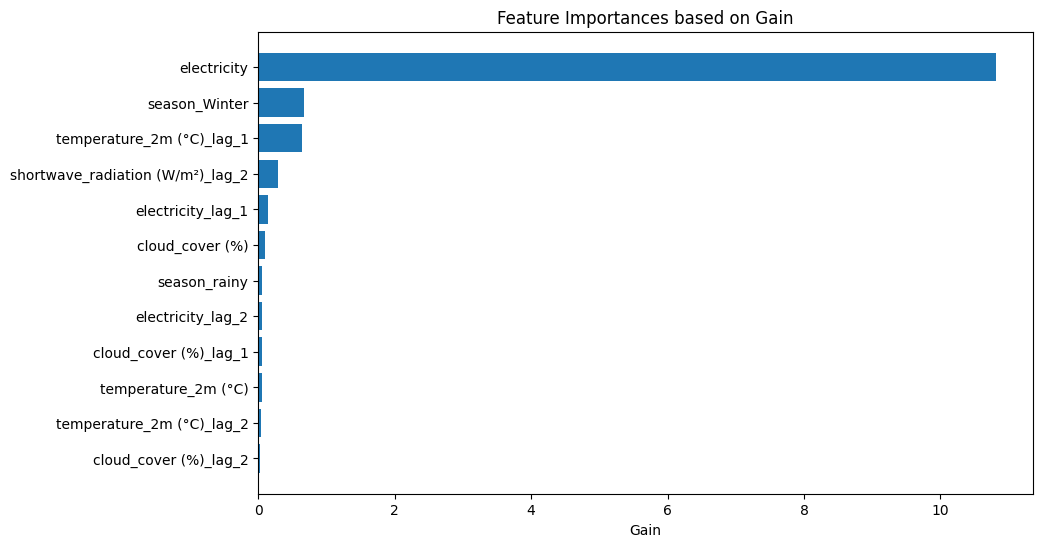

                             Feature       Gain
0                        electricity  10.818921
10                     season_Winter   0.666281
6          temperature_2m (°C)_lag_1   0.637148
5   shortwave_radiation (W/m²)_lag_2   0.284436
3                  electricity_lag_1   0.141067
2                    cloud_cover (%)   0.092891
11                      season_rainy   0.059938
4                  electricity_lag_2   0.057427
8              cloud_cover (%)_lag_1   0.057397
1                temperature_2m (°C)   0.052076
7          temperature_2m (°C)_lag_2   0.036746
9              cloud_cover (%)_lag_2   0.026364


In [40]:
# Plot the feature importance based on gain
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model
# Get the feature importances based on 'gain'
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')

# Convert it into a sorted DataFrame for better visualization
import pandas as pd
importance_df = pd.DataFrame(
    feature_importance.items(), columns=['Feature', 'Gain']
).sort_values(by='Gain', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Gain'])
plt.xlabel("Gain")
plt.title("Feature Importances based on Gain")
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

# Print the sorted feature importance
print(importance_df)


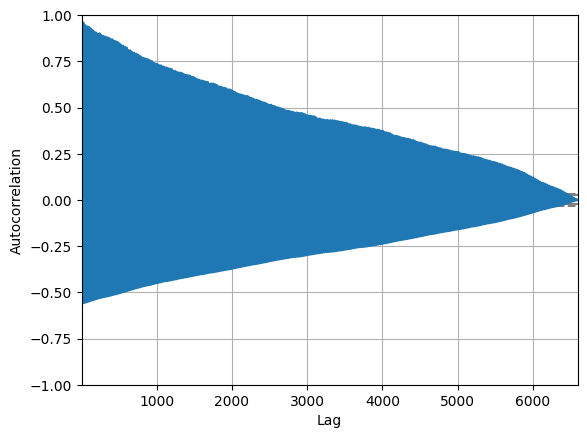

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['electricity'])
plt.show()


c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


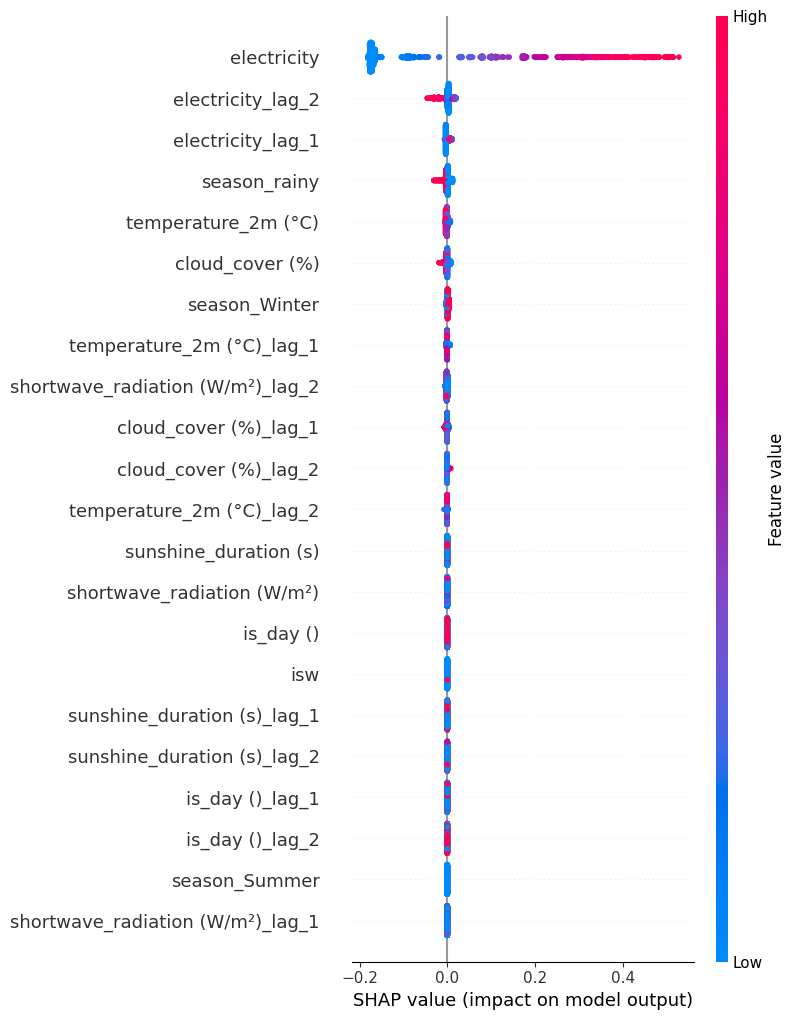

In [41]:
import shap

# Initialize SHAP explainer for your XGBoost model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test dataset
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])


In [31]:
import csv
import os


# Model evaluation metrics
mse = mean_squared_error(y_actual_oot, y_pred_oot)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual_oot, y_pred_oot)
r2 = r2_score(y_actual_oot, y_pred_oot)


features_used = list(X_train.columns)

# CSV file to store the results
csv_file = 'model_results.csv'

# Check if the file exists
file_exists = os.path.isfile(csv_file)

# Open the CSV file and append results
with open(csv_file, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=[
        'n_estimators', 'subsample', 'learning_rate', 'max_depth', 
        'colsample_bytree', 'min_child_weight', 'mse', 'rmse', 'mae', 'r2', 'features'
    ])
    
    # Write the header if the file does not exist
    if not file_exists:
        writer.writeheader()
    
    # Write the model results to the CSV
    writer.writerow({
        'n_estimators': xgb_model.get_params()['n_estimators'],
        'subsample': xgb_model.get_params()['subsample'],
        'learning_rate': xgb_model.get_params()['learning_rate'],
        'max_depth': xgb_model.get_params()['max_depth'],
        'colsample_bytree': xgb_model.get_params()['colsample_bytree'],
        'min_child_weight': xgb_model.get_params()['min_child_weight'],
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'features': ', '.join(features_used)  # Save features as a comma-separated string
    })

print("Model details and metrics saved successfully.")



Model details and metrics saved successfully.


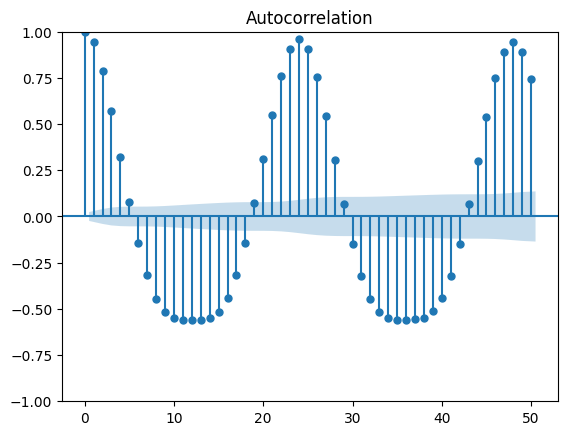

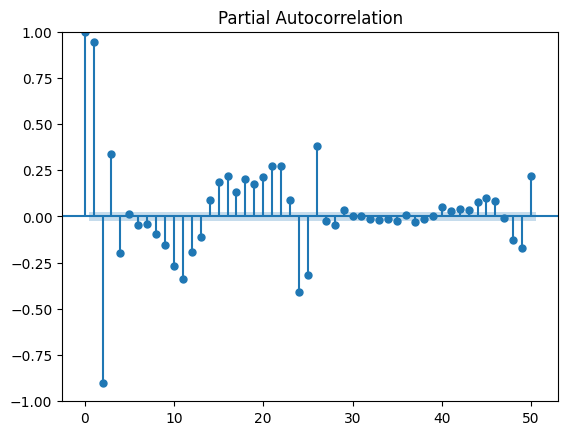

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for electricity
plot_acf(df['electricity'], lags=50)
plt.show()

plot_pacf(df['electricity'], lags=50)
plt.show()


In [21]:
!pip install graphviz